# Pré-processamento dos dados das estações pluviométricas do SIGA/AL


## 1.0 - Importando o módulo de pré-processamento 

In [1]:
#Inserindo caminho da pasta onde estão os modulos que utilizaremos
import sys
sys.path.insert(0, "/data/modulos_tratamento_dados/modulos")

#Importando os módulos
import modulo1_station_processing as modulo1 
import geopandas as gpd

## 2.0 - Obtendo procentagens de falhas para as estações

### 2.1 - Calculando e visualizando as informações

In [2]:
#Calculando porcentagem de falhas para diversas estações
path = r'/data/modulos_tratamento_dados/estacoes_sigaa'
df_info_stations = modulo1.read_full_stations(path) 

#Setando sistema de referência
df_info_stations.set_crs('EPSG:4326', inplace=True)

#Visualizando dataframe
df_info_stations.head()

,Orgão,Nome_esta,Data_start,Data_end,%_falha_full,%_falha_range,geometry
Code,,,,,,,
6551,CEMADEN,/data/modulos_tratamento_dados/estacoes_sigaa/...,2022-06-29,2024-06-23,0.275482,-99.0,POINT (-35.903 -9.829)
8201,CEMADEN,/data/modulos_tratamento_dados/estacoes_sigaa/...,2022-06-29,2024-06-23,0.275482,-99.0,POINT (-35.55892 -9.46292)
936061,ANA,/data/modulos_tratamento_dados/estacoes_sigaa/...,1961-01-01,1966-01-31,5.008078,-99.0,POINT (-36.3333 -9.63333)
936070,ANA,/data/modulos_tratamento_dados/estacoes_sigaa/...,1913-01-01,1987-12-31,2.219545,-99.0,POINT (-36.3036 -9.6836)
6716,CEMADEN,/data/modulos_tratamento_dados/estacoes_sigaa/...,2022-06-29,2024-06-23,0.275482,-99.0,POINT (-35.741 -9.573)


### 2.2 - Estações com menos de 10% de falhas em toda a série

In [48]:
#verificando disponibilidade de dados para todo o periodo 
df_info_stations[(df_info_stations['%_falha_full'] < 10)]

,Orgão,Nome_esta,Data_start,Data_end,%_falha_full,%_falha_range,geometry
Code,,,,,,,
6551,CEMADEN,Alto da Barra,2022-06-29,2024-06-23,0.275482,-99.000000,POINT (-35.903 -9.829)
8201,CEMADEN,Alto da Boa Vista,2022-06-29,2024-06-23,0.275482,-99.000000,POINT (-35.55892 -9.46292)
936061,ANA,ANADIA (LIMOEIRO),1961-01-01,1966-01-31,5.008078,-99.000000,POINT (-36.3333 -9.63333)
936070,ANA,ANADIA,1913-01-01,1987-12-31,2.219545,-99.000000,POINT (-36.3036 -9.6836)
6716,CEMADEN,Antares,2022-06-29,2024-06-23,0.275482,-99.000000,POINT (-35.741 -9.573)
...,...,...,...,...,...,...,...
936057,ANA,VIÇOSA (1),1913-01-01,1989-11-30,1.512832,-99.000000,POINT (-36.25 -9.38333)
936060,ANA,VIÇOSA (2),1983-01-01,1983-01-31,0.000000,-99.000000,POINT (-36.25 -9.38333)
936111,ANA,VIÇOSA,1989-01-26,2024-02-29,4.673116,0.599864,POINT (-36.2492 -9.3792)


### 2.3 - Estações com menos de 10% de falhas para o período de interesse (01-06-2000 até 30-06-2020)

In [49]:
#verificando para aquelas cuja disponibilidade está compreendida no período de interesse (01-06-2000 até 30-06-2020)
df_info_stations[(df_info_stations['%_falha_range'] < 10) & (df_info_stations['%_falha_range'] != -99)]

,Orgão,Nome_esta,Data_start,Data_end,%_falha_full,%_falha_range,geometry
Code,,,,,,,
936110,ANA,ATALAIA (1),1989-08-19,2024-02-29,1.657021,0.381731,POINT (-36.0233 -9.5072)
1036062,ANA,CAMAÇARI,1989-08-17,2023-11-30,2.443309,3.326517,POINT (-36.3039 -10.0314)
937013,ANA,DELMIRO GOUVÉIA,1936-04-01,2024-02-29,4.898633,0.013633,POINT (-37.9942 -9.3928)
935056,ANA,FAZENDA BOA FORTUNA,1989-08-19,2024-02-29,2.196147,2.508521,POINT (-35.8564 -9.4675)
935012,ANA,MURICI - PONTE,1963-01-01,2024-02-29,8.066249,0.722563,POINT (-35.9497 -9.3136)
1036005,ANA,PENEDO,1935-01-01,2024-02-29,1.286578,0.927062,POINT (-36.5564 -10.285)
1036007,ANA,PIAÇABUÇÚ (1),1928-09-18,2024-02-29,9.761065,0.722563,POINT (-36.4261 -10.4064)
937023,ANA,PIRANHAS,1935-01-01,2024-02-29,7.034728,0.054533,POINT (-37.7561 -9.6261)
937018,ANA,PÃO DE AÇÚCAR,1935-01-01,2024-02-29,7.673412,0.422631,POINT (-37.4497 -9.7486)


### 2.4 - Lendo arquivo de uma estação qualquer (Traipu)

In [50]:
2#Visualizando dataframe da estação de Traipu
df_traipu = modulo1.read_station('/data/modulos_tratamento_dados/estacoes_sigaa/TRAIPU.xlsx')
df_traipu.head()

Data  Precipitação (mm)
ID         geometry                                              
ANA_936076 POINT (-37.0033 -9.9728) 1973-01-01                0.0
           POINT (-37.0033 -9.9728) 1973-01-02                0.0
           POINT (-37.0033 -9.9728) 1973-01-03                1.7
           POINT (-37.0033 -9.9728) 1973-01-04                0.5
           POINT (-37.0033 -9.9728) 1973-01-05                0.2

### 2.5 - Filtrando estações por região ambiental de Alagoas

In [43]:
#Primeiro, lendo arquivos com shapefile de cada região
alagoas = gpd.read_file('/data/modulos_tratamento_dados/gis/Regioes_ambientais_alagoas.gpkg')
alagoas = alagoas[1:]
alagoas['RAmbiental'] = ['Agreste', 'Baixo São Francisco', 'Zona da Mata', 'Sertão', 'Litoral']
alagoas.drop(columns=['RAmbiental_2'], inplace=True)
alagoas.head()

,RAmbiental,geometry
1,Agreste,"MULTIPOLYGON (((-36.437 -9.2121, -36.43183 -9...."
2,Baixo São Francisco,"MULTIPOLYGON (((-36.68114 -9.96702, -36.68094 ..."
3,Zona da Mata,"MULTIPOLYGON (((-35.46658 -8.81764, -35.46516 ..."
4,Sertão,"MULTIPOLYGON (((-37.75111 -8.85595, -37.75012 ..."
5,Litoral,"MULTIPOLYGON (((-35.75801 -9.69305, -35.75809 ..."


#### 2.5.1 - Filtrando todas as estações, independente da porcentagem de falhas 

In [66]:
#Agora, realizando a seleção das estações em cada região
agreste_full = df_info_stations[df_info_stations.geometry.within(alagoas.loc[1].geometry)]
baixo_sf_full = df_info_stations[df_info_stations.geometry.within(alagoas.loc[2].geometry)]
zona_mata_full = df_info_stations[df_info_stations.geometry.within(alagoas.loc[3].geometry)]
sertao_full = df_info_stations[df_info_stations.geometry.within(alagoas.loc[4].geometry)]
litoral_full = df_info_stations[df_info_stations.geometry.within(alagoas.loc[5].geometry)]

#Verificando quantidade de estações por região
print('Agreste: ', len(agreste_full))
print('Baixo São Francisco', len(baixo_sf_full))
print('Zona da Mata', len(zona_mata_full))
print('Setão: ', len(sertao_full))
print('Litoral', len(litoral_full))

Agreste:  34
Baixo São Francisco 15
Zona da Mata 57
Setão:  44
Litoral 46


#### 2.5.2 - Filtrando, por região, apenas as estações com menos de 10% de falha para o período de interesse

In [72]:
#Guarando estações com falha menor do que 10%
stations = df_info_stations[(df_info_stations['%_falha_range'] < 10) & (df_info_stations['%_falha_range'] != -99)]

#Agora, realizando a seleção das estações em cada região
agreste = stations[stations.geometry.within(alagoas.loc[1].geometry)]
baixo_sf = stations[stations.geometry.within(alagoas.loc[2].geometry)]
zona_mata = stations[stations.geometry.within(alagoas.loc[3].geometry)]
sertao = stations[stations.geometry.within(alagoas.loc[4].geometry)]
litoral = stations[stations.geometry.within(alagoas.loc[5].geometry)]

#Verificando quantidade de estações por região
print('Agreste: ', len(agreste))
print('Baixo São Francisco', len(baixo_sf))
print('Zona da Mata', len(zona_mata))
print('Setão: ', len(sertao))
print('Litoral', len(litoral))

Agreste:  0
Baixo São Francisco 2
Zona da Mata 7
Setão:  5
Litoral 1


In [73]:
sertao

,Orgão,Nome_esta,Data_start,Data_end,%_falha_full,%_falha_range,geometry
Code,,,,,,,
937013,ANA,DELMIRO GOUVÉIA,1936-04-01,2024-02-29,4.898633,0.013633,POINT (-37.9942 -9.3928)
937023,ANA,PIRANHAS,1935-01-01,2024-02-29,7.034728,0.054533,POINT (-37.7561 -9.6261)
937018,ANA,PÃO DE AÇÚCAR,1935-01-01,2024-02-29,7.673412,0.422631,POINT (-37.4497 -9.7486)
937032,ANA,SANTANA DO IPANEMA (2),1978-11-12,2024-02-29,1.099964,0.899796,POINT (-37.2453 -9.3728)
936076,ANA,TRAIPU,1973-01-01,2023-11-30,5.312971,0.027267,POINT (-37.0033 -9.9728)


### MÓDULO 1 ENCERROU ACIMA. ESTOU AJUSTANDO MÓDULO 2 PARA PODER EXCLUIR TODO O CÓDIGO ABAIXO

#### 3.1 - Teste de aderência (Kolmogorov-Smirnov)

In [ ]:
# Komolgorov-Smirnov para distribuição Gumbell
def ks_gumbel(sample):

  # Organizando os dados da amostra em ordem crescente
  sample = sample.sort_values()

  # Extraindo parâmetros
  param = scipy.stats.gumbel_r.fit(sample)
  media = param[0]
  desv_std = param[1]

  # Criando uma lista para armazenarmos os valores de critério D_ks
  D_ks = []

  #Loop para obter as probabilidades empíricas e teóricas
  for x in sample:
    cdf_gev = scipy.stats.gumbel_r.cdf(x = x, loc = media , scale = desv_std)
    cdf_sample = cdf(sample = sample, x  = x)
    #guardando em uma lista as "distâncias" entre os valores empíricos e teóricos
    D_ks.append(abs(cdf_gev - cdf_sample))

  #obtendo a máxima distância
  ks_stat = max(D_ks)

  # Calculates the P-Value based on the two-sided test
  # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
  p_value = scipy.stats.kstwo.sf(ks_stat, len(sample))
  return {"ks_stat": ks_stat, "p_value" : p_value}

# Komolgorov-Smirnov para distribuição Gumbell
def ks_gev(sample):

  # Organizando os dados da amostra em ordem crescente
  sample = sample.sort_values()

  # Extraindo parâmetros
  param = scipy.stats.genextreme.fit(sample)
  c = param[0]
  media = param[1]
  desv_std = param[2]

  # Criando uma lista para armazenarmos os valores de critério D_ks
  D_ks = []

  #Loop para obter as probabilidades empíricas e teóricas
  for x in sample:
    cdf_gev = scipy.stats.genextreme.cdf(x = x, c=c, loc = media , scale = desv_std)
    cdf_sample = cdf(sample = sample, x  = x)
    #guardando em uma lista as "distâncias" entre os valores empíricos e teóricos
    D_ks.append(abs(cdf_gev - cdf_sample))

  #obtendo a máxima distância
  ks_stat = max(D_ks)

  # Calculates the P-Value based on the two-sided test
  # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
  p_value = scipy.stats.kstwo.sf(ks_stat, len(sample))
  return {"ks_stat": ks_stat, "p_value" : p_value}

In [ ]:
print('Gumbel:', ks_gumbel(traipu_max_dia))
print('GEV:', ks_gev(traipu_max_dia))


Gumbel: {'ks_stat': 0.10958690383942335, 'p_value': 0.5486790683120023}
GEV: {'ks_stat': 0.10516925002918118, 'p_value': 0.6005556336049607}


### 4.0 - Tempo de retorno

In [ ]:
traipu_ord = (traipu_max_dia.sort_values(ascending=False)).reset_index()


len(traipu_ord[traipu_ord['Precipitação (mm)'] >= traipu_ord.loc[0]['Precipitação (mm)']])/len(traipu_ord)

0.02

C:\Users\Ari\AppData\Local\Temp\ipykernel_10536\2295675443.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.scatter( (1/(1-values_prob)), prec_gumbel, color='black')


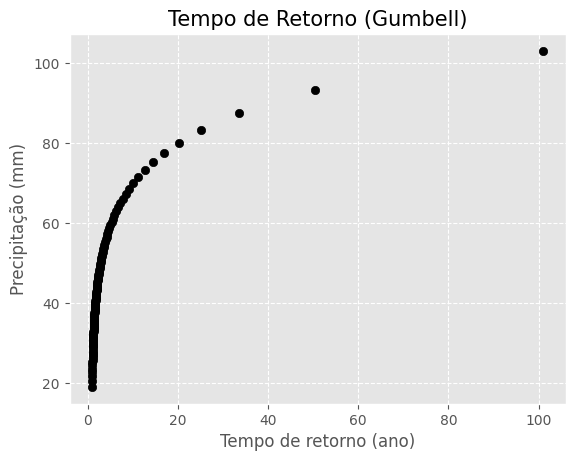

In [ ]:
parametros_gumbel = scipy.stats.gumbel_r.fit(traipu_max_dia)
values_prob = np.linspace(0.02, 1, 10**2)
prec_gumbel = scipy.stats.gumbel_r.ppf(values_prob, loc=parametros_gumbel[0], scale=parametros_gumbel[1])

#Distribuiçao de Gumbel (expressa em TR)
plt.scatter( (1/(1-values_prob)), prec_gumbel, color='black')
plt.title('Tempo de Retorno (Gumbell)', fontsize=15)
plt.ylabel('Precipitação (mm)', fontsize=12)
plt.xlabel('Tempo de retorno (ano)', fontsize=12)
plt.grid(linestyle='--')
plt.show() 